In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("Bankruptcy Dataset.xlsx")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [7]:
df.duplicated().sum()

147

In [8]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [21]:
num_cols = [fe for fe in df.columns if df[fe].dtype in ['int64', 'float64']]

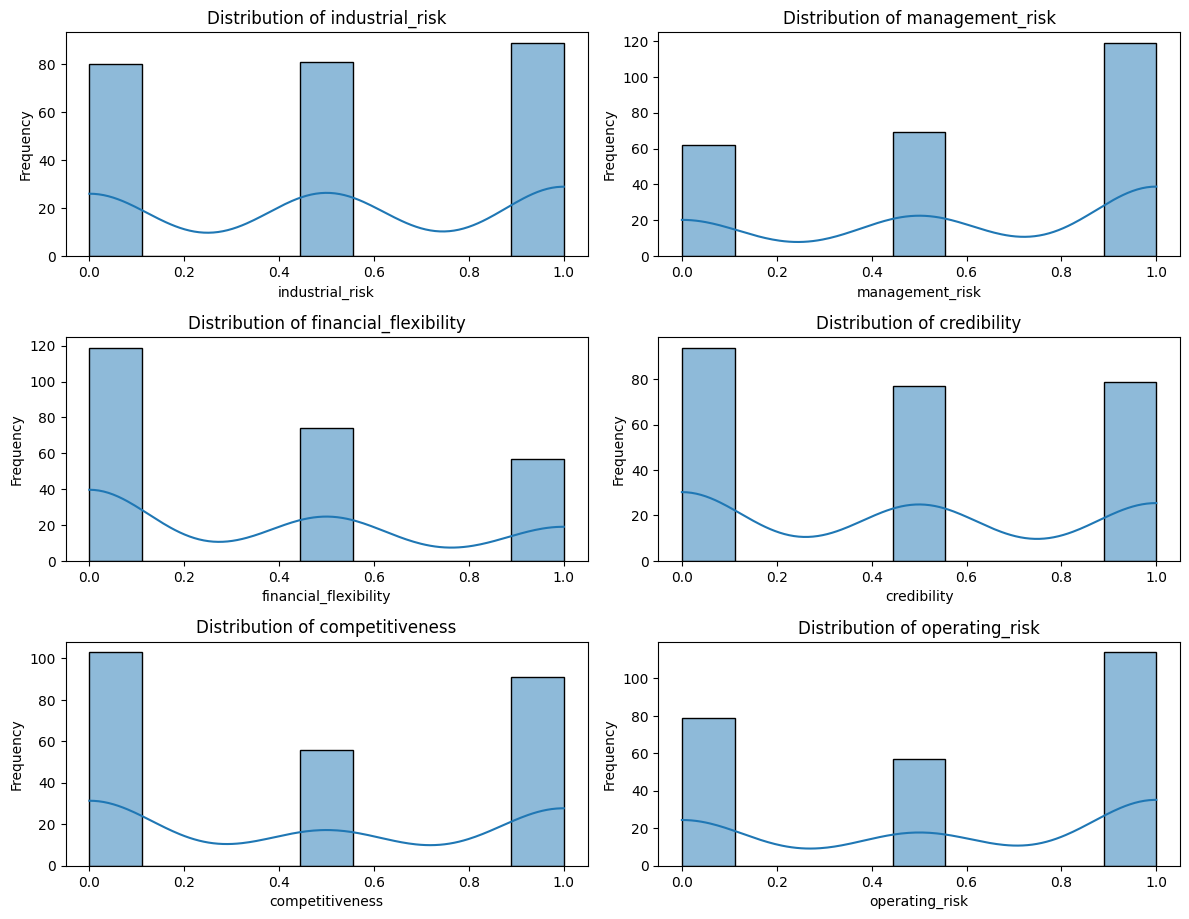

In [24]:
plt.figure(figsize=(12,len(num_cols)*3))
for i,fe in enumerate(num_cols,1):
    plt.subplot(len(num_cols),2,i)
    sns.histplot(df[fe],kde=True,palette='viridis')
    plt.title('Distribution of {}'.format(fe))
    plt.xlabel(fe)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

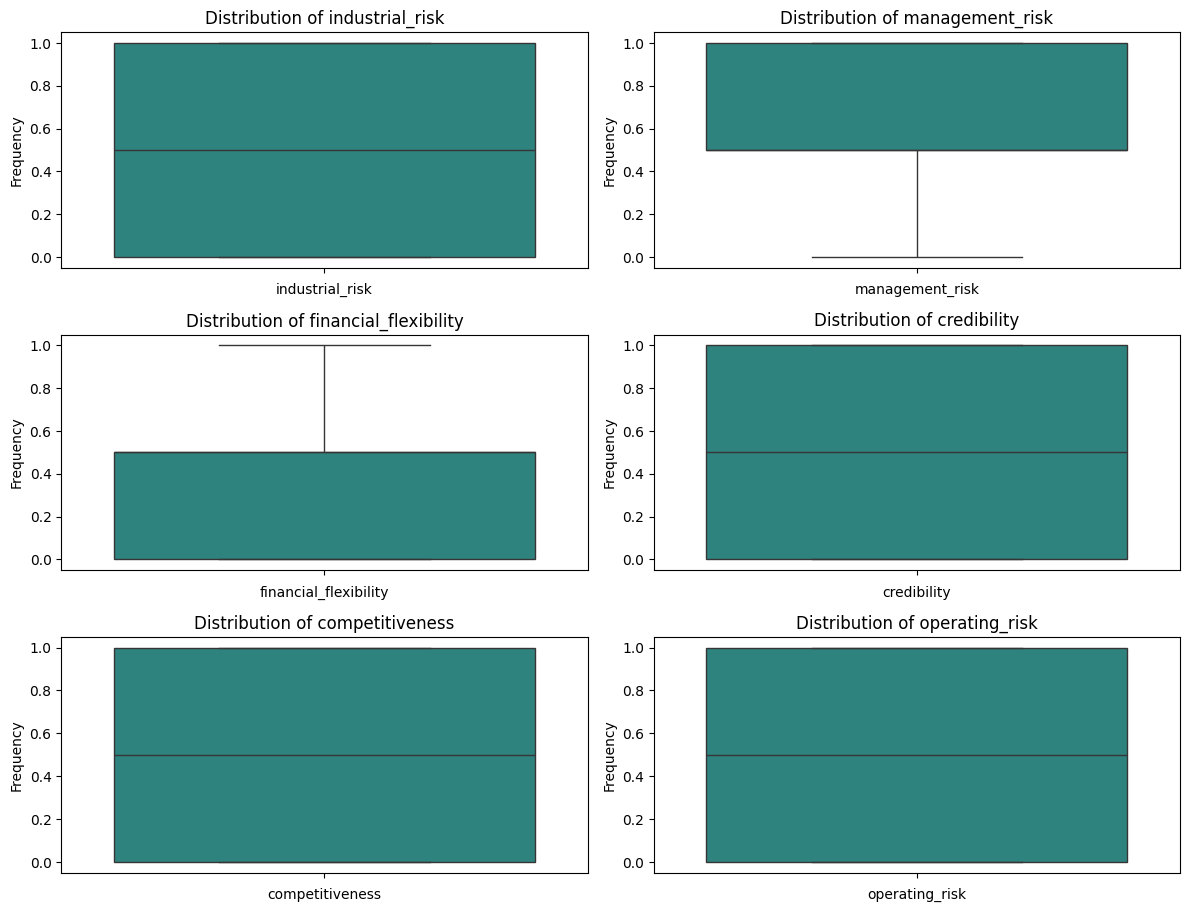

In [25]:
plt.figure(figsize=(12,len(num_cols)*3))
for i,fe in enumerate(num_cols,1):
    plt.subplot(len(num_cols),2,i)
    sns.boxplot(df[fe],palette='viridis')
    plt.title('Distribution of {}'.format(fe))
    plt.xlabel(fe)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: xlabel='industrial_risk'>

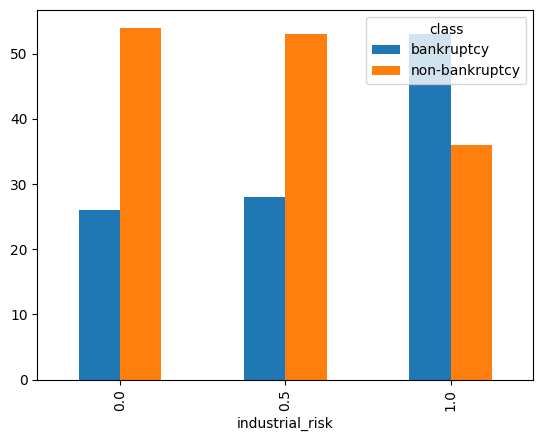

In [30]:
pd.crosstab(df['industrial_risk'],df['class']).plot(kind='bar')

<Axes: xlabel='industrial_risk', ylabel='count'>

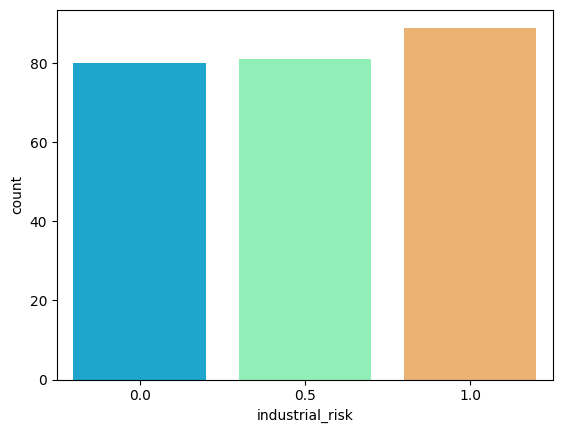

In [31]:
sns.countplot(x='industrial_risk',data=df,palette='rainbow')

<Axes: xlabel='management_risk', ylabel='count'>

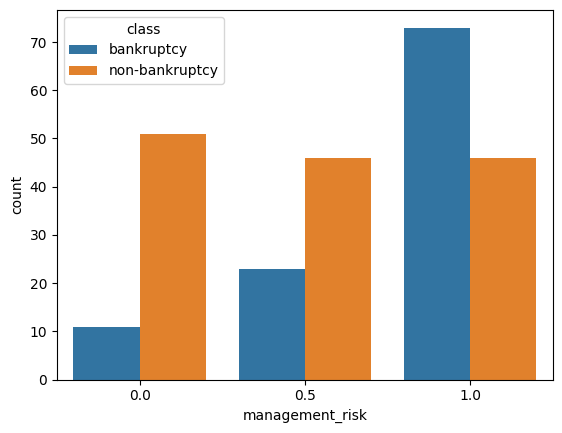

In [32]:
sns.countplot(x='management_risk',data=df,hue='class')

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

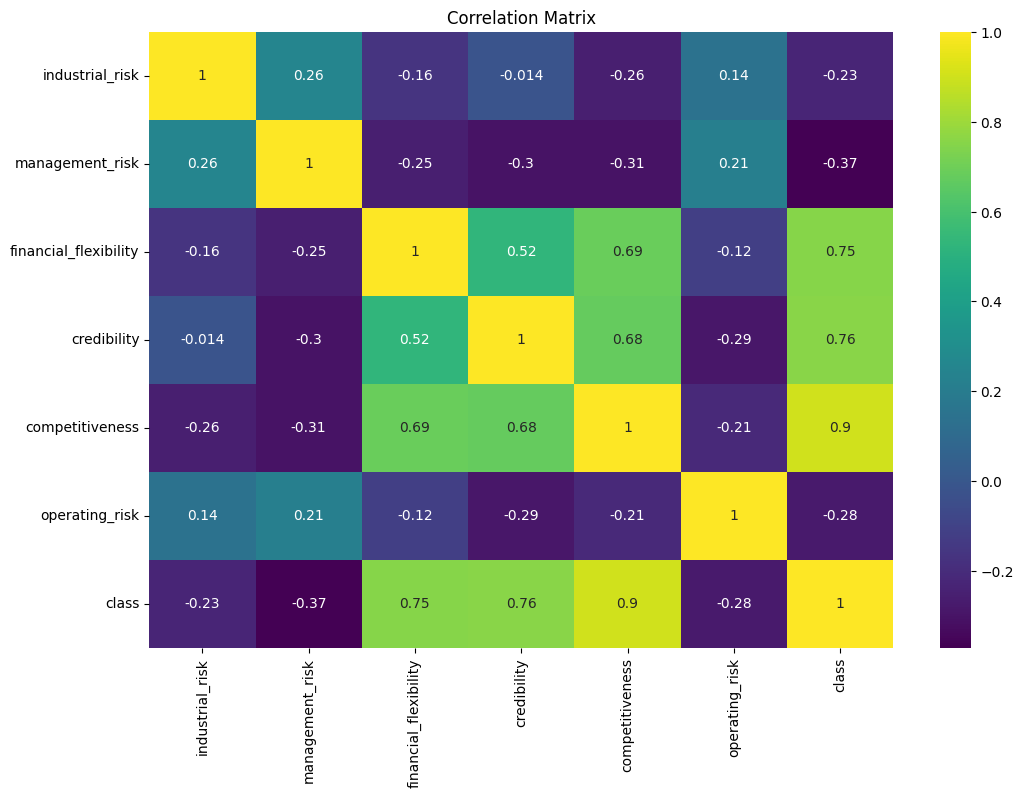

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Correlation Matrix')
plt.show()